# Capstone Project: Fuel Consumption of Different Car Models
## By: Zaid Al-Jawadi

First, let's import the libraries needed and read the csv file.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('MY1995-2023 Fuel Consumption Ratings 5-cycle.csv', encoding='latin1')

In [3]:
df.head()

YEAR   MAKE         MODEL VEHICLE CLASS  ENGINE SIZE (L)  CYLINDERS  \
0  1995  ACURA       INTEGRA    SUBCOMPACT              1.8          4   
1  1995  ACURA       INTEGRA    SUBCOMPACT              1.8          4   
2  1995  ACURA  INTEGRA GS-R    SUBCOMPACT              1.8          4   
3  1995  ACURA        LEGEND       COMPACT              3.2          6   
4  1995  ACURA  LEGEND COUPE       COMPACT              3.2          6   

  TRANSMISSION FUEL TYPE  FUEL CONSUMPTION CITY (L/100 km)  \
0           A4         X                              11.6   
1           M5         X                              11.0   
2           M5         Z                              10.8   
3           A4         Z                              14.2   
4           A4         Z                              14.6   

   FUEL CONSUMPTION HWY (L/100 km)  FUEL CONSUMPTION COMB (L/100 km)  \
0                              8.3                              10.1   
1                              8.3                               9.8   
2                              8.3                               9.7   
3                             10.5                              12.5   
4                             11.0                              13.0   

   FUEL CONSUMPTION COMB (mpg)  CO2 EMISSIONS (g/km)  CO2 RATING  Smog RATING  
0                           28                   232         NaN          NaN  
1                           29                   225         NaN          NaN  
2                           29                   223         NaN          NaN  
3                           23                   288         NaN          NaN  
4                           22                   299         NaN          NaN

Now, let's see if there are null values.
CO2 RATING and Smog RATING are parameters that were added in more recent years: CO2 RATING and Smog RATING started being tracked in 2016 and 2017, respectively, hence the null values in the majority of the dataset. For now, the two columns will be kept to see if any trends can be deduced for the previous years or if the null values can be filled based on models developed for CO2 emissions. Otherwise, the columns can be deleted.

In [4]:
df.isnull().sum()

YEAR                                    0
MAKE                                    0
MODEL                                   0
VEHICLE CLASS                           0
ENGINE SIZE (L)                         0
CYLINDERS                               0
TRANSMISSION                            0
FUEL TYPE                               0
FUEL CONSUMPTION CITY (L/100 km)        0
FUEL CONSUMPTION HWY (L/100 km)         0
FUEL CONSUMPTION COMB (L/100 km)        0
FUEL CONSUMPTION COMB (mpg)             0
CO2 EMISSIONS (g/km)                    0
CO2 RATING                          18991
Smog RATING                         20101
dtype: int64

In [5]:
df.shape

(27052, 15)

Only 3 duplicated rows can be found, which does not impact the dataset. 

In [32]:
df.duplicated().sum()

3

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27052 entries, 0 to 27051
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   YEAR                              27052 non-null  int64  
 1   MAKE                              27052 non-null  object 
 2   MODEL                             27052 non-null  object 
 3   VEHICLE CLASS                     27052 non-null  object 
 4   ENGINE SIZE (L)                   27052 non-null  float64
 5   CYLINDERS                         27052 non-null  int64  
 6   TRANSMISSION                      27052 non-null  object 
 7   FUEL TYPE                         27052 non-null  object 
 8   FUEL CONSUMPTION CITY (L/100 km)  27052 non-null  float64
 9   FUEL CONSUMPTION HWY (L/100 km)   27052 non-null  float64
 10  FUEL CONSUMPTION COMB (L/100 km)  27052 non-null  float64
 11  FUEL CONSUMPTION COMB (mpg)       27052 non-null  int64  
 12  CO2 

In [8]:
df.describe()

YEAR  ENGINE SIZE (L)     CYLINDERS  \
count  27052.000000     27052.000000  27052.000000   
mean    2010.023510         3.347050      5.836796   
std        7.950154         1.342093      1.803439   
min     1995.000000         0.800000      2.000000   
25%     2004.000000         2.300000      4.000000   
50%     2010.000000         3.000000      6.000000   
75%     2017.000000         4.200000      8.000000   
max     2023.000000         8.400000     16.000000   

       FUEL CONSUMPTION CITY (L/100 km)  FUEL CONSUMPTION HWY (L/100 km)  \
count                      27052.000000                     27052.000000   
mean                          13.840844                        10.010428   
std                            3.741765                         2.588809   
min                            4.000000                         3.900000   
25%                           11.300000                         8.200000   
50%                           13.400000                         9.500000   
75%                           15.900000                        11.400000   
max                           33.300000                        22.100000   

       FUEL CONSUMPTION COMB (L/100 km)  FUEL CONSUMPTION COMB (mpg)  \
count                      27052.000000                 27052.000000   
mean                          12.117274                    24.932907   
std                            3.185538                     6.729091   
min                            4.000000                    10.000000   
25%                            9.900000                    20.000000   
50%                           11.600000                    24.000000   
75%                           13.900000                    29.000000   
max                           27.500000                    71.000000   

       CO2 EMISSIONS (g/km)   CO2 RATING  Smog RATING  
count          27052.000000  8061.000000  6951.000000  
mean             275.535155     4.640739     4.751259  
std               65.865680     1.603253     1.788972  
min               94.000000     1.000000     1.000000  
25%              230.000000     4.000000     3.000000  
50%              268.000000     5.000000     5.000000  
75%              315.000000     6.000000     6.000000  
max              633.000000    10.000000     8.000000

In [9]:
df["MAKE"].nunique()

90

In [10]:
df["MAKE"].unique()

array(['ACURA', 'ALFA ROMEO', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'EAGLE', 'FERRARI',
       'FORD', 'GEO', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'ISUZU',
       'JAGUAR', 'JEEP', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MAZDA',
       'MERCEDES-BENZ', 'MERCURY', 'NISSAN', 'OLDSMOBILE', 'PLYMOUTH',
       'PONTIAC', 'PORSCHE', 'ROLLS-ROYCE', 'SAAB', 'SATURN', 'SUBARU',
       'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'DAEWOO', 'KIA',
       'MASERATI', 'MINI', 'MITSUBISHI', 'SMART', 'HUMMER',
       'ASTON MARTIN', 'LAMBORGHINI', 'BUGATTI', 'SCION', 'FIAT', 'RAM',
       'SRT', 'GENESIS', 'Acura', 'Alfa Romeo', 'Aston Martin', 'Audi',
       'Bentley', 'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler',
       'Dodge', 'Ford', 'Genesis', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lincoln', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Mitsubishi',
       'Nissan', 'Porsche',

We can see that some car makes are identical but one is spelled in uppercase letters and the other is spelled with only the first letter capitalized and the rest in lowercase. Hence, we need to make sure that these are treated the same. To do that, all values in 'MAKE' will be converted to uppercase.  

In [11]:
df['MAKE'] = df['MAKE'].str.upper()

In [12]:
df["MAKE"].unique()

array(['ACURA', 'ALFA ROMEO', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'EAGLE', 'FERRARI',
       'FORD', 'GEO', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'ISUZU',
       'JAGUAR', 'JEEP', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MAZDA',
       'MERCEDES-BENZ', 'MERCURY', 'NISSAN', 'OLDSMOBILE', 'PLYMOUTH',
       'PONTIAC', 'PORSCHE', 'ROLLS-ROYCE', 'SAAB', 'SATURN', 'SUBARU',
       'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'DAEWOO', 'KIA',
       'MASERATI', 'MINI', 'MITSUBISHI', 'SMART', 'HUMMER',
       'ASTON MARTIN', 'LAMBORGHINI', 'BUGATTI', 'SCION', 'FIAT', 'RAM',
       'SRT', 'GENESIS'], dtype=object)

In [13]:
df["MAKE"].nunique()

55

Now, we have all car makes in uppercase. There are 55 unique car makes. 

Let's explore the VEHICLE CLASS column.

In [14]:
df['VEHICLE CLASS'].unique()

array(['SUBCOMPACT', 'COMPACT', 'TWO-SEATER', 'STATION WAGON - SMALL',
       'MINICOMPACT', 'MID-SIZE', 'FULL-SIZE', 'STATION WAGON - MID-SIZE',
       'VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SUV',
       'MINIVAN', 'PICKUP TRUCK - SMALL', 'UL', 'SPECIAL PURPOSE VEHICLE',
       'SUV - SMALL', 'SUV - STANDARD', 'Compact', 'SUV: Small',
       'Two-seater', 'Mid-size', 'Minicompact', 'Subcompact',
       'Station wagon: Small', 'Full-size', 'SUV: Standard',
       'Special purpose vehicle', 'Pickup truck: Small',
       'Pickup truck: Standard', 'Minivan', 'Van: Passenger',
       'Station wagon: Mid-size'], dtype=object)

In [15]:
df['VEHICLE CLASS'].nunique()

33

Again, converting the VEHICLE CLASS to all uppercase to avoid duplicated names.

In [16]:
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.upper()

In [17]:
df['VEHICLE CLASS'].unique()

array(['SUBCOMPACT', 'COMPACT', 'TWO-SEATER', 'STATION WAGON - SMALL',
       'MINICOMPACT', 'MID-SIZE', 'FULL-SIZE', 'STATION WAGON - MID-SIZE',
       'VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SUV',
       'MINIVAN', 'PICKUP TRUCK - SMALL', 'UL', 'SPECIAL PURPOSE VEHICLE',
       'SUV - SMALL', 'SUV - STANDARD', 'SUV: SMALL',
       'STATION WAGON: SMALL', 'SUV: STANDARD', 'PICKUP TRUCK: SMALL',
       'PICKUP TRUCK: STANDARD', 'VAN: PASSENGER',
       'STATION WAGON: MID-SIZE'], dtype=object)

In [18]:
df['VEHICLE CLASS'].nunique()

25

We can see that some vehicle class names are identical, but have been listed slightly differently. For example:
SUV - SMALL and SUV: SMALL
SUV - STANDARD and SUV: STANDARD
STATION WAGON - SMALL and STATION WAGON: SMALL
STATION WAGON - MID-SIZE and STATION WAGON: MID-SIZE
PICKUP TRUCK - SMALL and PICKUP TRUCK: SMALL
PICKUP TRUCK - STANDARD and PICKUP TRUCK: STANDARD
VAN - PASSENGER and VAN: PASSENGER

Let's make sure that these are fixed to reflect the same

In [19]:
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.replace('SUV: SMALL', 'SUV - SMALL')
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.replace('SUV: STANDARD', 'SUV - STANDARD')
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.replace('STATION WAGON: SMALL', 'STATION WAGON - SMALL')
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.replace('STATION WAGON: MID-SIZE', 'STATION WAGON - MID-SIZE')
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.replace('PICKUP TRUCK: SMALL', 'PICKUP TRUCK - SMALL')
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.replace('PICKUP TRUCK: STANDARD', 'PICKUP TRUCK - STANDARD')
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.replace('VAN: PASSENGER', 'VAN - PASSENGER')


In [20]:
df['VEHICLE CLASS'].unique()

array(['SUBCOMPACT', 'COMPACT', 'TWO-SEATER', 'STATION WAGON - SMALL',
       'MINICOMPACT', 'MID-SIZE', 'FULL-SIZE', 'STATION WAGON - MID-SIZE',
       'VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SUV',
       'MINIVAN', 'PICKUP TRUCK - SMALL', 'UL', 'SPECIAL PURPOSE VEHICLE',
       'SUV - SMALL', 'SUV - STANDARD'], dtype=object)

In [21]:
df['VEHICLE CLASS'].nunique()

18

Let's now look at the top 25 car brands with the most car models over the 1995-2023 timeframe and make a bar plot of it.

In [22]:
df_Make=df['MAKE'].value_counts().reset_index().rename(columns={'index':'Make','Make':'Count'})[0:25]
df_Make

MAKE  count
0       CHEVROLET   2554
1            FORD   2202
2             BMW   1672
3             GMC   1638
4   MERCEDES-BENZ   1424
5           DODGE   1256
6          TOYOTA   1233
7         PORSCHE   1031
8            AUDI    926
9      VOLKSWAGEN    917
10         NISSAN    894
11          MAZDA    762
12          HONDA    665
13           JEEP    642
14        HYUNDAI    638
15          VOLVO    612
16         SUBARU    610
17            KIA    555
18          LEXUS    510
19       CHRYSLER    501
20       CADILLAC    485
21           MINI    431
22         JAGUAR    421
23        PONTIAC    390
24          BUICK    334

In [23]:
df_Make=df['MAKE'].value_counts().reset_index().rename(columns={'index':'Make','Make':'Count'})[0:25]
df_Make
fig = go.Figure(go.Bar(
    x=df_Make['MAKE'],y=df_Make['count'],
    marker={'color': df_Make['count'], 
    'colorscale': 'Viridis'},  
    text=df_Make['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 25 Companies',xaxis_title="Vehicle Make",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()


Now, let's look at the vehicle class and the total CO2 emissions. PICKUP TRUCK - STANDARD has the highest CO2 emissions. However, this relationship might not be true representation of the relationship between vehicle class and CO2 emissions as the number of cars of a vehicle class varies, so some vehicle class might be more represented than others. Hence, some form of normalization is needed to represent this relationship better. 

In [26]:

# Group by 'Vehicle Class' and calculate the sum of 'CO2 Emissions(g/km)'
df_v_class = df.groupby('VEHICLE CLASS')['CO2 EMISSIONS (g/km)'].sum().reset_index()

# Sort the DataFrame by 'CO2 Emissions(g/km)' in descending order
df_v_class = df_v_class.sort_values(by='CO2 EMISSIONS (g/km)', ascending=False)

# Create the bar chart
fig = go.Figure(go.Bar(
    x=df_v_class['VEHICLE CLASS'],
    y=df_v_class['CO2 EMISSIONS (g/km)'],
    marker={'color': df_v_class['CO2 EMISSIONS (g/km)'], 'colorscale': 'Viridis'},
    text=df_v_class['CO2 EMISSIONS (g/km)'],
    textposition="outside",
))

# Update layout
fig.update_layout(
    title_text='CO2 vs Vehicle Class',
    xaxis_title="Vehicle Class",
    yaxis_title="Total CO2 Emissions",
    title_x=0.5
)

# Show the figure
fig.show()


Now, let's look at the count of vehicles and the respective number of cylinders and generate a bar plot. This will give us a breakdown of the cylinders of the vehicle models.

In [27]:
df['CYLINDERS'].value_counts()

CYLINDERS
4     9707
6     9675
8     6167
5      591
12     506
3      194
10     180
2       17
16      15
Name: count, dtype: int64

In [31]:
cylinders_counts = df['CYLINDERS'].value_counts()

# Create the bar chart with hovertext
fig = go.Figure(go.Bar(
    x=cylinders_counts.index,
    y=cylinders_counts.values,
    marker={'color': cylinders_counts.values, 'colorscale': 'Viridis'},
    text=cylinders_counts.values,
    hovertext=[f'Cylinders: {count}' for count in cylinders_counts.values],  # Hovertext
))

# Update layout
fig.update_layout(
    title_text='Cylinder Counts',
    xaxis_title="Cylinders",
    yaxis_title="Count",
    title_x=0.5
)

We can see from the above that most vehicle models have 4 and 6 cylinders, followed by 8 cylinders.

Let's generate a pairplot to explore the different relationships between variables.

C:\Users\zaidj\Contacts\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



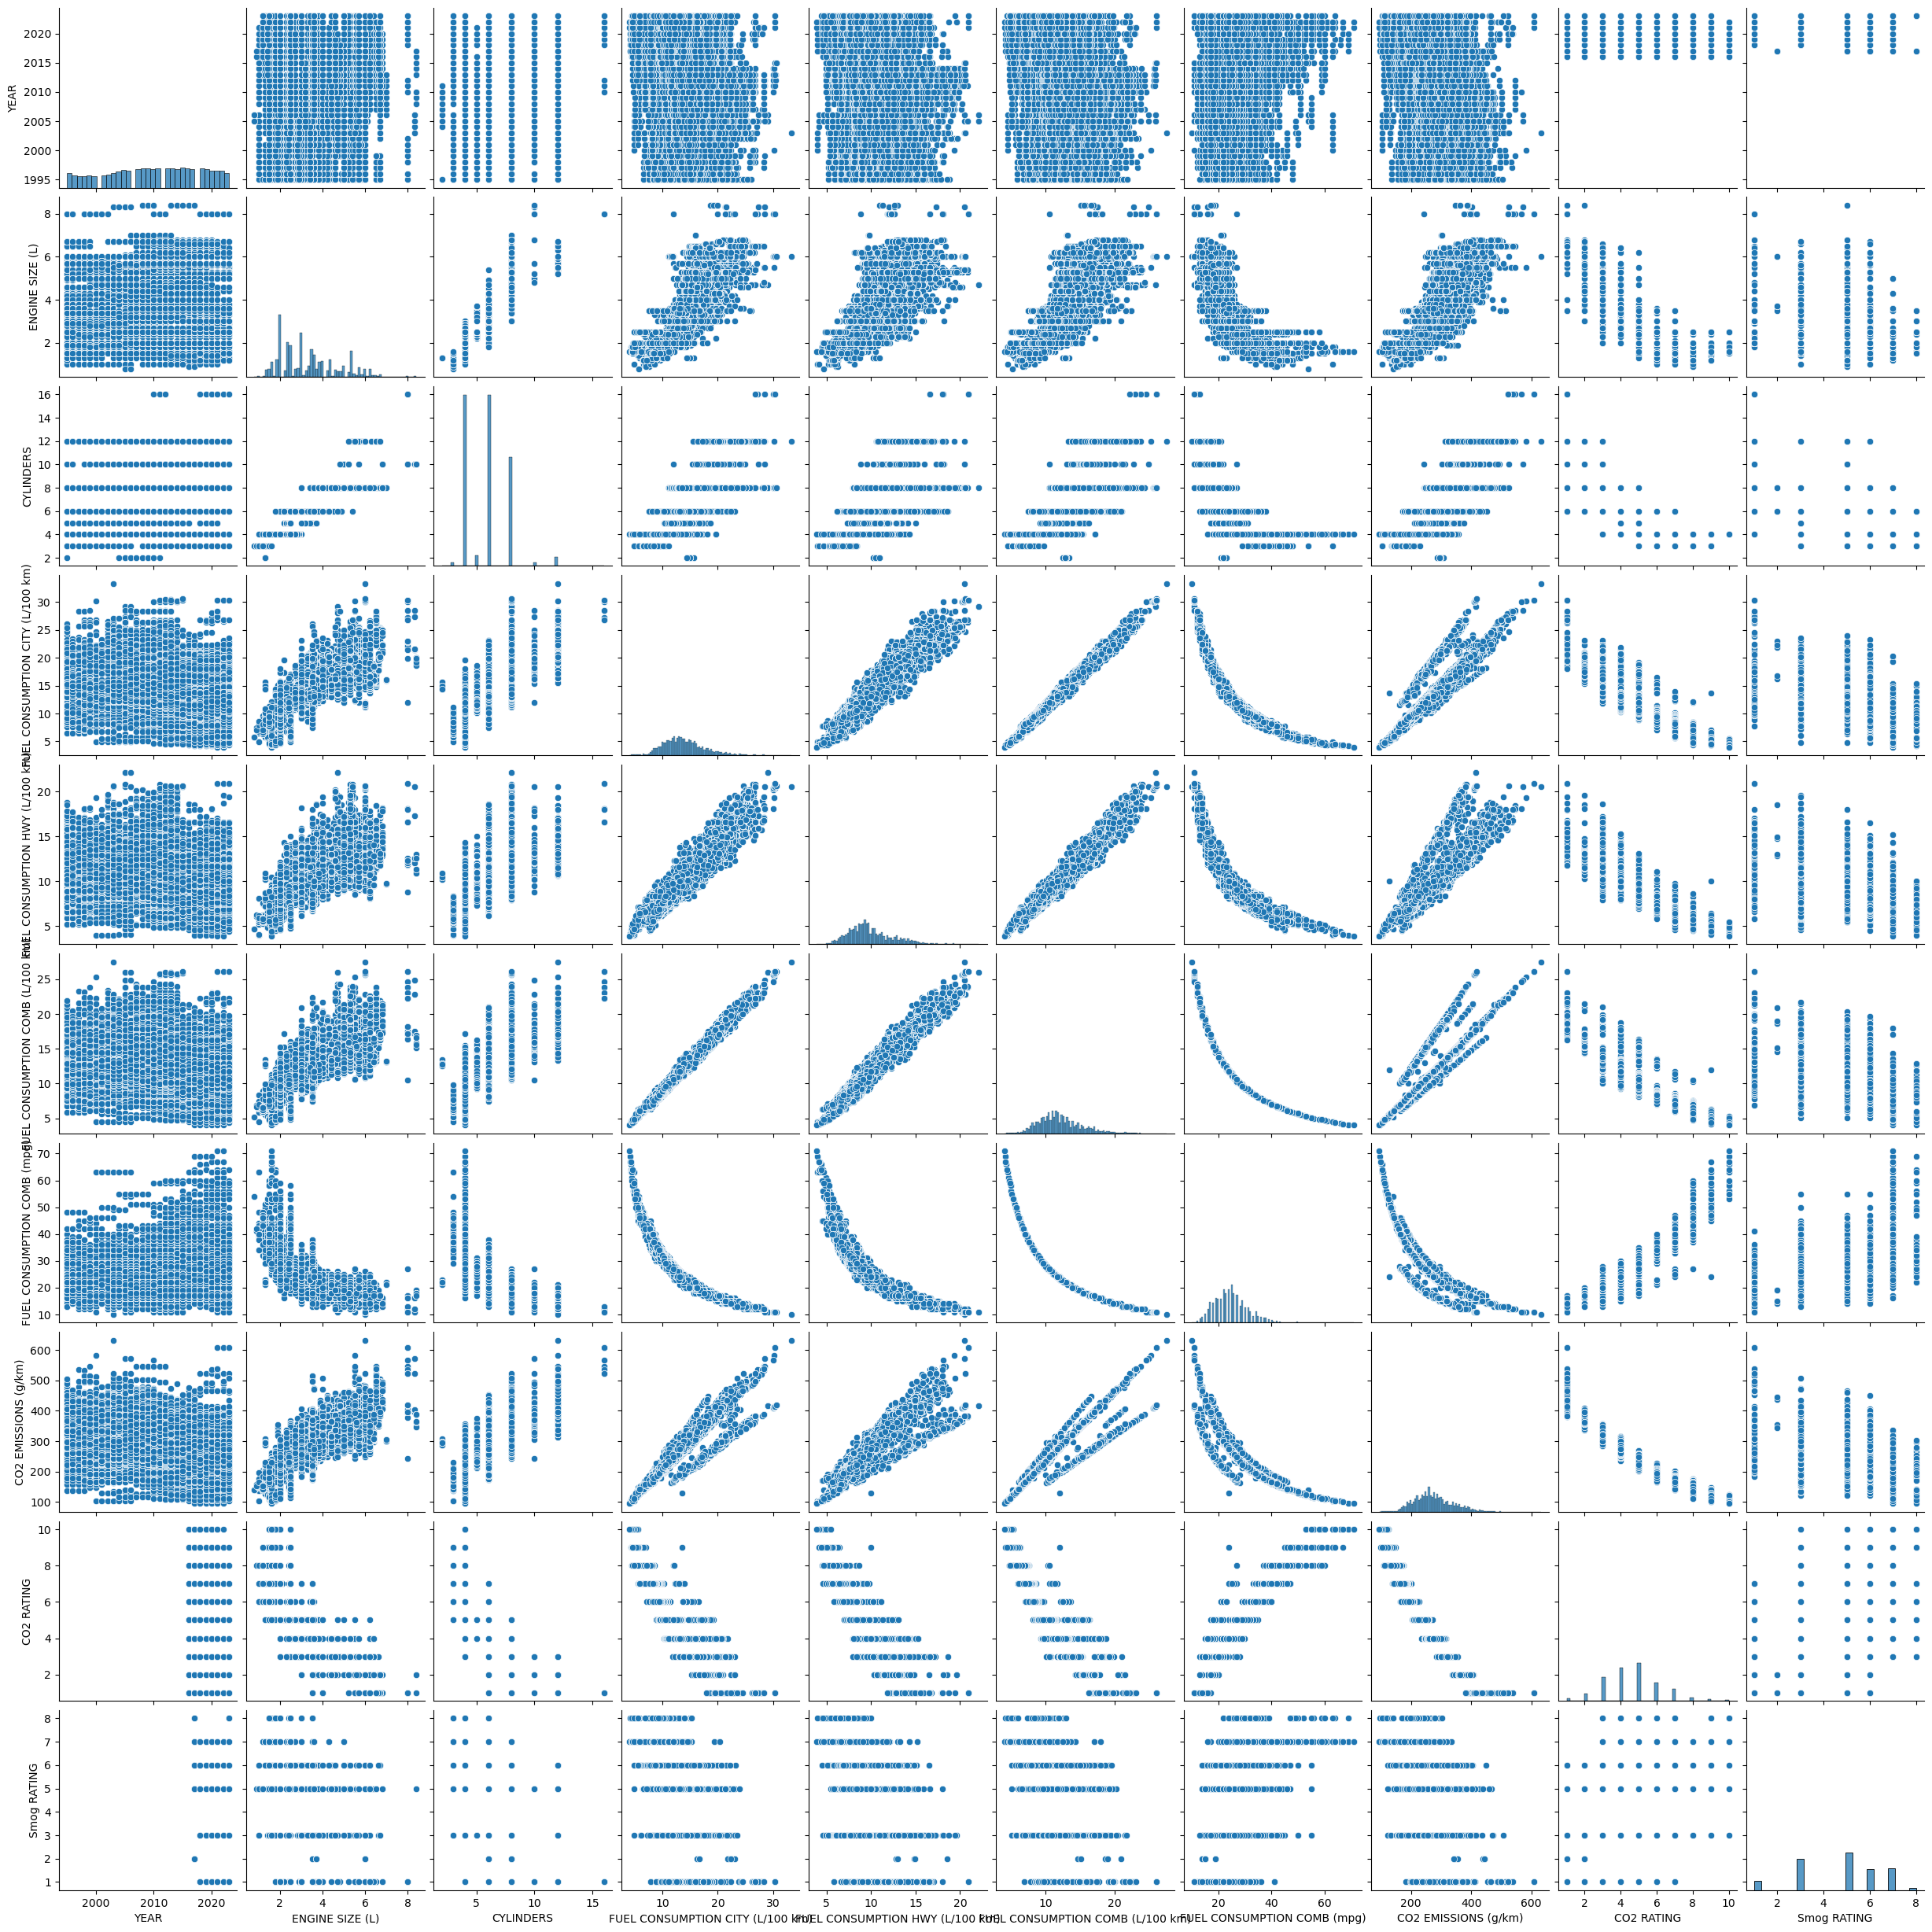

In [37]:
sns.pairplot(df)
plt.show()

Later on, more EDA will be done to explore relationships between different car features and fuel consumption. After that, models will be applied to predict fuel consumption and CO2 emissions from car features.